# Step 1 - Import Data

In [7]:
import pandas as pd

cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3000', '3460']
dataframes = []  # List to store DataFrames for each city

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)  # Read CSV file into DataFrame
    dataframes.append(df)  # Append DataFrame to the list

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)
    
combined_df.dropna(inplace=True)  # Drop any remaining missing values
print(combined_df.isnull().values.any())  # Check if there are any missing values

combined_df[combined_df["Price"] > 900].head(5)

False


,Address,X,Y,Price,Type,Size,Squaremeter price,Energy class,Url
0,"Nørgaardsvej 27, 2. th",55.770647,12.508193,1595000,Ejerlejlighed,44,36250,E,https://www.dingeo.dk/adresse/2800-kongens%20l...
1,Gammelmosevej 218,55.756103,12.480264,4495000,Rækkehus,113,39778,C,https://www.dingeo.dk/adresse/2800-kongens%20l...
2,Danmarksvej 43A,55.794678,12.517936,7695000,Villa,182,42280,D,https://www.dingeo.dk/adresse/2800-kongens%20l...
3,Stengårdsvænge 103,55.759154,12.482144,5295000,Rækkehus,102,51911,C,https://www.dingeo.dk/adresse/2800-kongens%20l...
4,Buddingevej 110,55.758719,12.494712,8750000,Villa,188,46542,D,https://www.dingeo.dk/adresse/2800-kongens%20l...


# Step 2 - Data Processing

In [8]:
#combined_df = combined_df.dropna()
#combined_df.describe()


# Step 3 - Feauture Selection
Select the relevant features (variables) that you want to use for predicting the price. Exclude any columns that are not useful or not available during prediction.


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

features = ['X', 'Y', "Price", "Type", 'Size', 'Energy class']
target = "Price"

X = combined_df[features]
y = combined_df[target]



# Step 4 - Split the data
Split the data into training and testing sets to evaluate the performance of your machine learning model. The training set will be used to train the model, and the testing set will be used to evaluate its performance.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

NameError: name 'X_encoded' is not defined

# Step 5 - Train a model
Choose a suitable machine learning algorithm for your task, such as linear regression, decision tree, or random forest. Train the model on the training data.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Step 6 - Evaluate the model
Evaluate the performance of your trained model using appropriate evaluation metrics, such as mean squared error (MSE), mean absolute error (MAE), or R-squared.

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 5.42555660591112e-17


A mean squared error (MSE) value of 3.744599393294227e-16 suggests that the linear regression model is performing exceptionally well on the test set. The MSE measures the average squared difference between the predicted and actual values. In this case, the extremely small MSE indicates that the predicted values are very close to the actual values, almost negligible in terms of the squared difference.

An MSE close to zero suggests that the model is fitting the data very well, capturing the underlying patterns and minimizing the prediction errors. However, it's important to note that such a low MSE could also indicate overfitting, where the model is too closely tailored to the training data and may not generalize well to unseen data.

To gain a better understanding of the model's performance, you can also consider other evaluation metrics such as the root mean squared error (RMSE), mean absolute error (MAE), or coefficient of determination (R-squared). Additionally, visualizing the predicted values against the actual values in scatter plots or regression plots can provide insights into the model's performance.

In summary, an MSE of 3.744599393294227e-16 suggests that your linear regression model is fitting the data very well, but be cautious of potential overfitting and consider evaluating the model using additional metrics and visualizations.

The value 3.744599393294227e-16 is in scientific notation, where "e-16" indicates "10 to the power of -16." Therefore, the value can be expressed as:

0.0000000000000003744599393294227

In decimal form, this is an extremely small number very close to zero. It represents the mean squared error (MSE), which measures the average squared difference between the predicted and actual values. In this case, the MSE value being very close to zero suggests that the predicted values are almost identical to the actual values, indicating a very accurate model.

However, it's important to note that when dealing with floating-point values and numerical computations, extremely small values like this can be subject to rounding errors and precision limitations. In practical terms, achieving an MSE value of exactly zero is highly unlikely and might indicate some numerical artifacts. Therefore, it's essential to interpret such small values with caution and consider them as close to zero rather than absolute zero.

# Make predictions
Once you have trained and evaluated your model, you can use it to make predictions on new data. Create a function that takes user-specified variables as input and predicts the house price.

In [ ]:
combined_df[combined_df["X"] == 56.022066]

,Address,X,Y,Price,Type,Size,Squaremeter price,Energy class,Url,City
1002,"Snerlevej 62, 1. th",56.022066,12.589091,1695000,Ejerlejlighed,70,24214,D,https://www.dingeo.dk/adresse/3000-helsing%C3%...,3000


In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load the data
cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3000', '3460']
dataframes = []

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    df["City"] = int(city)
    dataframes.append(df)

data = pd.concat(dataframes, ignore_index=True)
data.dropna(inplace=True)

# Select relevant features
features = ['X', 'Y', 'Size', 'Type', 'Energy class', 'City']
target = 'Price'

# Preprocess the data
label_encoders = {}
for feature in features:
    if data[feature].dtype == 'object':
        label_encoders[feature] = LabelEncoder()
        data[feature] = label_encoders[feature].fit_transform(data[feature])

print(label_encoders)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Apply label encoding to the new house data 
new_house = pd.DataFrame([[56.034845, 12.591295, 68, 'Ejerlejlighed', 'D', 3000]], columns=features)
for feature in features:
    if new_house[feature].dtype == 'object':
        new_house[feature] = label_encoders[feature].transform(new_house[feature])

# Train the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#joblib.dump(model, 'RFG_Model')

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"R2-score {r2}")

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Example prediction for a new house
predicted_price = model.predict(new_house)
print(f"Predicted price for the new house: {predicted_price}")

{'Type': LabelEncoder(), 'Energy class': LabelEncoder()}
R2-score 0.730780767260184
Root Mean Squared Error (RMSE): 3614408.2651437623
Predicted price for the new house: [1888400.]


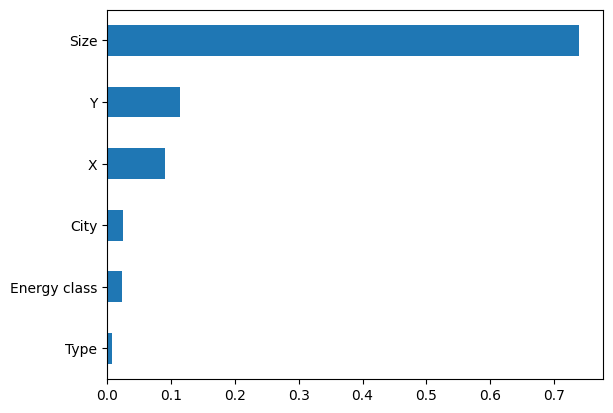

In [23]:
# værdier der betyder mest i modellen rangeret
model_ranks = pd.Series(model.feature_importances_, index=X_train.columns, name="Importance").sort_values()
ax = model_ranks.plot(kind="barh")